In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')


# Data Retrieval

In [8]:
dataset=pd.read_csv('UberDataset.csv')
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
dataset.shape
# 1156 line, 7 columns


(1156, 7)

In [ ]:
dataset.info()
#it shows PURPOSE column has lots of NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Pre-Processing

In [ ]:
dataset['PURPOSE'].fillna("NOT",inplace=True)
dataset.head()
#replace null values with keyword NOT

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [16]:
# reformat the start_date and end_date columns to proper datetime format
dataset['START_DATE']=pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE']=pd.to_datetime(dataset['END_DATE'],errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [17]:
#create new columns-from separating date and time in START_DATE column
from datetime import datetime

dataset['date']=pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time']=pd.DatetimeIndex(dataset['START_DATE']).hour

# set categories of time to day~night
dataset['date-night']=pd.cut(x=dataset['time'], #bins means [0~10=morning],[10~15=afternoon],[15~19=evening],[19~24=night]
                             bins=[0,10,15,19,24],
                             labels=['Morning','Afternoon', 'Evening', 'Night'])

dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,date-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [ ]:
# dropping rows with null values
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   date-night  413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


In [19]:
# dropping columns with duplicates
dataset.drop_duplicates(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   date-night  413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


# Data Visualisation

In [ ]:
# check the unique values in dataset of columns with the datatype "object"-as you can see from dataset.info()

obj=(dataset.dtypes == 'object')
object_cols=list(obj[obj].index)

# create a dict
unique_values={}

#find number of unique values in each column
for col in object_cols:
    unique_values[col]=dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

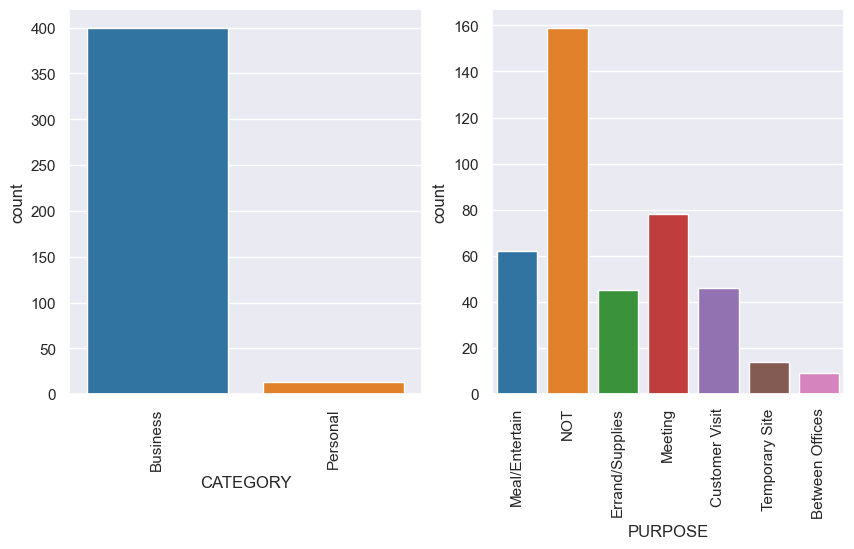

In [47]:
#using matplotlib and seaborn library to create countplot for CATEGORY and PURPOSE columns.
sns.set_theme()
plt.figure(figsize=(10,5))

#1 row, 2 columns, 1st plot
plt.subplot(1,2,1)
sns.countplot(x='CATEGORY', data=dataset, palette='tab10', stat='count')
plt.xticks(rotation=90) #draw x-axis label to be 90 degress rotated 

plt.subplot(1,2,2)
sns.countplot(x=dataset['PURPOSE'], palette='tab10')
plt.xticks(rotation=90)

In [48]:
# need to rename column- mislabel the column day-night to date-night

dataset.rename(columns={'date-night':'day-night'},inplace=True)
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

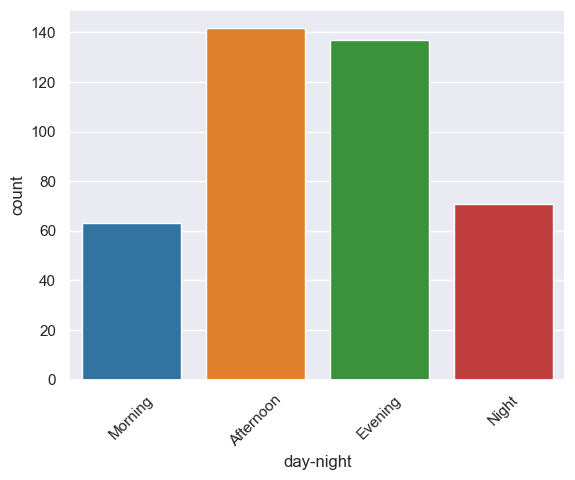

In [50]:
# create countplot for derived column 'day-night'

sns.countplot(x=dataset['day-night'],palette='tab10')
plt.xticks(rotation=45)

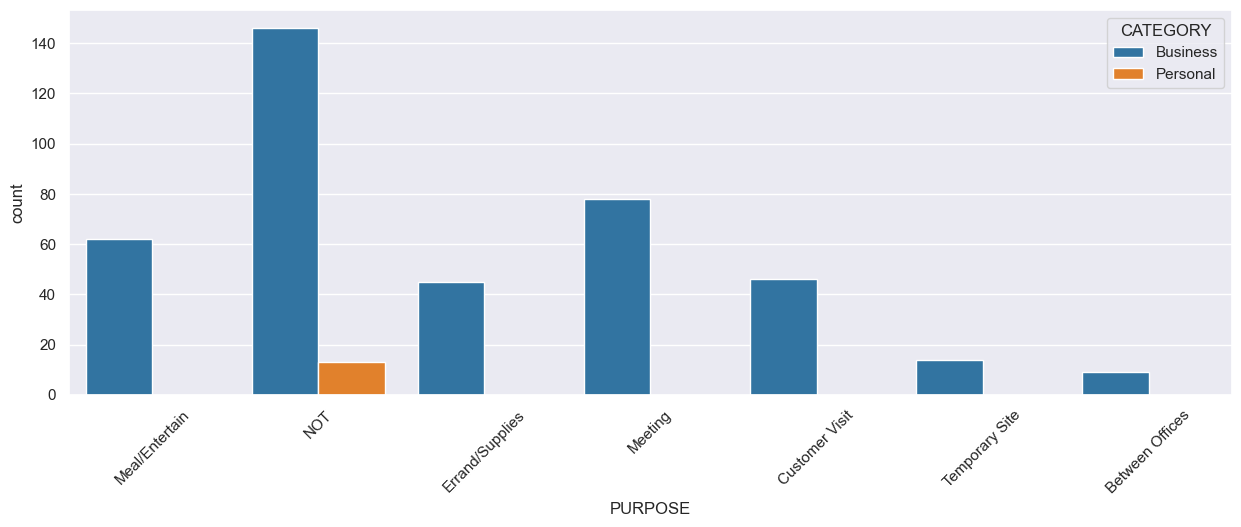

In [53]:
# so now, the CATEGORY graph shows that there is 2 type of category
# I will be comparing the PURPOSE of the stay by the CATEGORY using 'hue' attribute

# first, set the figuresize
plt.figure(figsize=(15,5))

# then, create countplot where x=purpose and the hue(legend) is category
sns.countplot(x=dataset['PURPOSE'], hue=dataset['CATEGORY'], palette='tab10')

# rotate the x-axis label to 45 degrees
plt.xticks(rotation=45)

# show the graph
plt.show()

Insights obtain from the graphs before:
- Most of the rides booked are for business purpose.
- Most of the rides are either for meeting or meal/entertainment purpose
- Most of the rides are booked during afternoon hour (12 p.m until 3 p.m)

In [55]:
from sklearn.preprocessing import OneHotEncoder

object_cols=['CATEGORY','PURPOSE']
OH_encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols=pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index=dataset.index
OH_cols.columns=OH_encoder.get_feature_names_out()
df_dinal=dataset.drop(object_cols,axis=1)
dataset=pd.concat([df_dinal,OH_cols],axis=1)

dataset.head()

,START_DATE,END_DATE,START,STOP,MILES,date,time,day-night,CATEGORY_Business,CATEGORY_Personal,PURPOSE_Between Offices,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_NOT,PURPOSE_Temporary Site
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-01-02,1.0,Morning,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-01-05,17.0,Evening,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-01-06,14.0,Afternoon,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

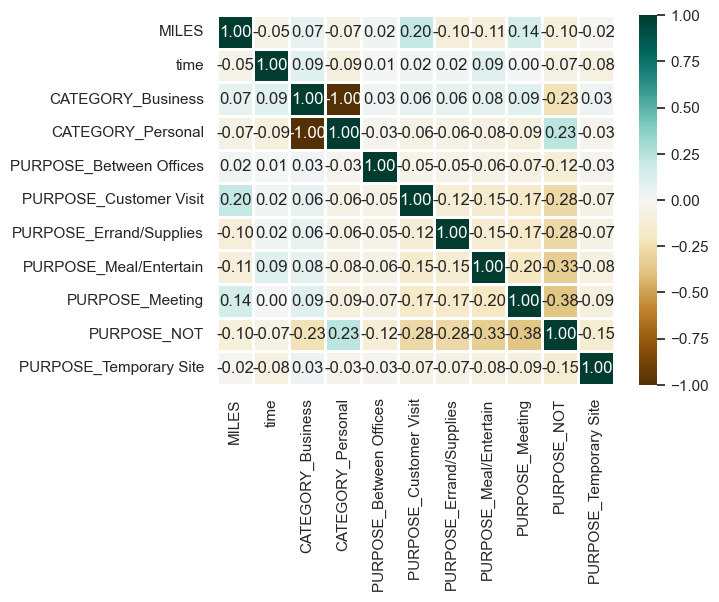

In [56]:
numeric_dataset= dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

Insights gained from the heatmaps:
- Business and Personal category are highly negatively correlated with each other, as been proven before. This heatmap justifies the conclusion before.
- There is not much correlation between the features.

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

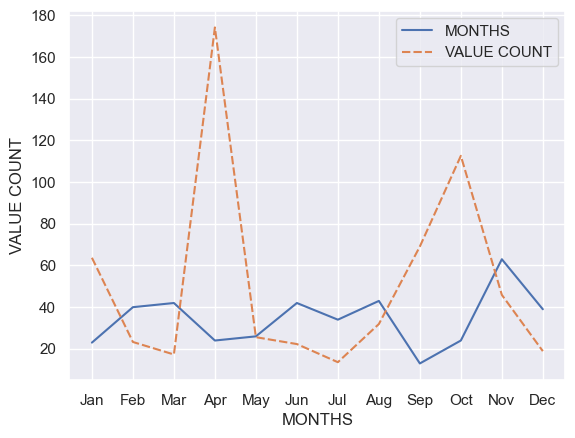

In [63]:
# next, visualizing the month data- from the column START_DATE

# deriving new column using DateTimeIndex- so far('date','hour','month')
dataset['MONTH']=pd.DatetimeIndex(dataset['START_DATE']).month

#create a dictionary to label number to format-MMM
month_label={1.0:"Jan",2.0:"Feb",3.0:"Mar",4.0:"Apr",5.0:"May",
             6.0:"Jun",7.0:"Jul",8.0:"Aug", 9.0:"Sep",10.0:"Oct",
             11.0:"Nov",12.0:"Dec"}

# map the 'MONTH' value to string format 
dataset['MONTH']=dataset.MONTH.map(month_label)

# create new variable mon to assign count of rides occurences by month
mon=dataset.MONTH.value_counts(sort=False)

# plot Month total rides count against Month max distance
df=pd.DataFrame({"MONTHS":mon.values,
                 "VALUE COUNT":dataset.groupby('MONTH',sort=False)['MILES'].max()})

plot=sns.lineplot(data=df)
plot.set(xlabel="MONTHS", ylabel="VALUE COUNT")


Insights gained from the above plot:
- The counts are very irregular.
- It can be seen that the ride counts dropped after November until January. It justifies the fact that it is winter time at Florida, US which resulted to the dropping count.

DAY
Fri    86
Mon    61
Thu    61
Tue    58
Sat    52
Wed    48
Sun    47
Name: count, dtype: int64


Text(0, 0.5, 'COUNT')

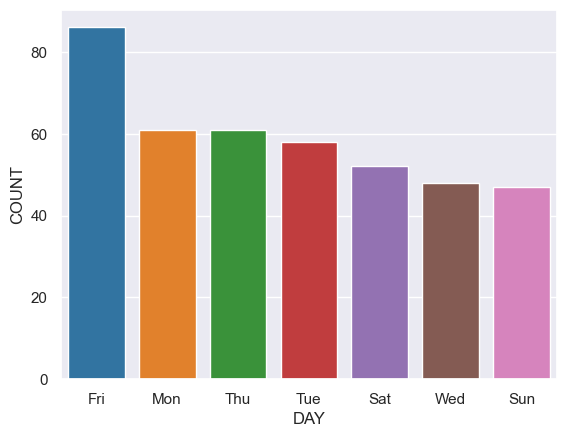

In [69]:
# visualization for days data- before already done months
dataset['DAY']=dataset.START_DATE.dt.weekday

# create a dictionary for days 0-Monday, 6-Sunday
days_label={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

# map the DAY column to their respective string
dataset['DAY']=dataset.DAY.map(days_label)

# count the occurence for each day
count_days=dataset.DAY.value_counts()
print(count_days)

# plot the label-count_days.index to the values count_days
sns.barplot(x=count_days.index,y=count_days,palette='tab10')
plt.xlabel('DAY')
plt.ylabel('COUNT')


Insight gained:
- People use uber ride services the most during Friday.

<Axes: ylabel='MILES'>

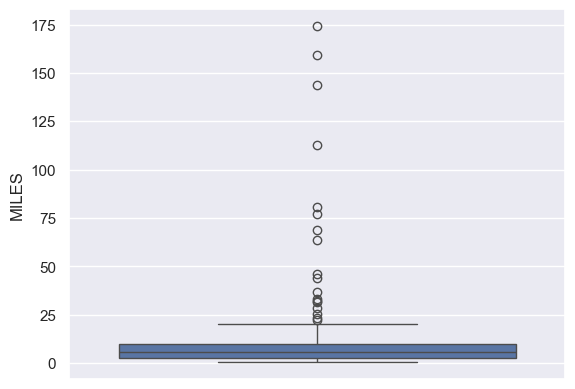

In [ ]:
# Explore MILES Column
# trying the boxplot to view distribution of the column

sns.boxplot(dataset['MILES'])

# the produced plot is not very clear for interpretation


<Axes: ylabel='MILES'>

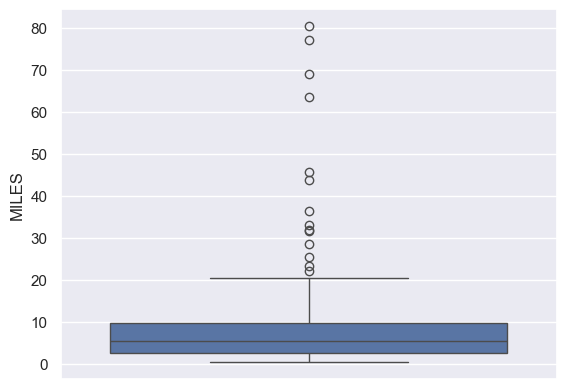

In [ ]:
# try boxplot again but with MILES values less than 100
# for enhance clarity

sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

# the produced plot has better visibility.
# it seems that most of the uber rides distance is 40 miles and below.

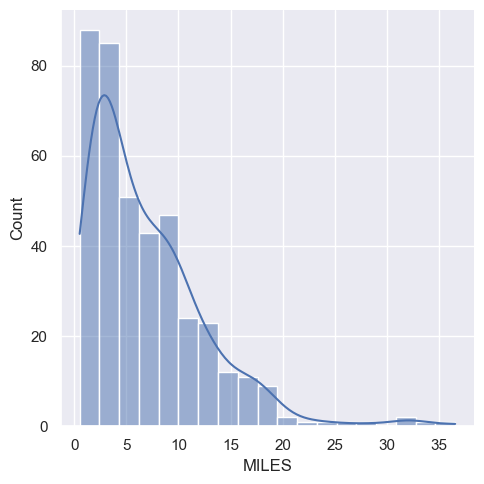

In [ ]:
# to get better understanding, lets try distplot
# for values less than 40 miles.

sns.displot(dataset[dataset['MILES']<40]['MILES'],kde=True)

Insights gained:
- Most of the cabs booked are for distance 4 to 5 miles.
- In general, people booked uber cabs for ride distancing 0 to 20 miles.
- For distance more than 20 miles, the ride counts are very minimal that it is nearly negligible.